In [2]:
import pandas as pd
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import geopandas as gpd

# EXPLORATIVE ANALYSIS

## Analysis of change in LORs

In [206]:
# Model initialization
regression_model = LinearRegression()

df['reg_coef'] = None
df['nan_count'] = 0

for index, row in df.iterrows():
    df.loc[index,'nan_count'] = row[:-2][row[:-2].isna()].shape[0]
    y = row.iloc[2:15].dropna()
    idx = y.index
    x = []
    for key in idx:
        x.append(row.index.get_loc(key))
    if x:
        df.loc[index,'reg_coef'] = regression_model.fit(np.array(x).reshape(-1, 1), y).coef_[0]

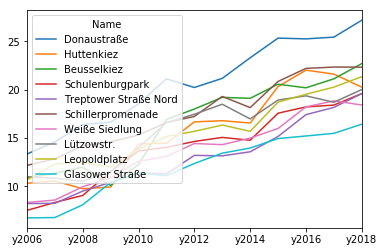

In [209]:
df[(df.nan_count < 5) & (df.reg_coef > 0)].sort_values('reg_coef', ascending=False).set_index('Name').iloc[:,1:14].head(10).T.plot()

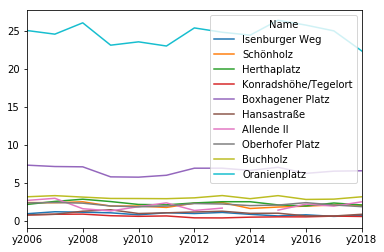

In [210]:
df[(df.nan_count < 5) & (df.reg_coef < 0)].sort_values('reg_coef', ascending=True).set_index('Name').iloc[:,1:14].head(10).T.plot()

In [219]:
# set coef to nan where there are not enough values
df = df.loc[(df.nan_count < 5)]
df['reg_coef'] = pd.to_numeric(df['reg_coef']).round(2)

In [220]:
df_coef = df.set_index(['Kennung'])[['reg_coef']]

plr = gpd.read_file('lor_planungsraeume.geojson', encoding='utf-8')

data = df_coef.join(plr.set_index('spatial_name'), rsuffix='_r')

gpd.GeoDataFrame(data).to_file('time_change.geojson', driver='GeoJSON', encoding='utf-8')

AttributeError: 'float' object has no attribute '__geo_interface__'